In [1]:
import os
from os.path import join
import sys
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
from notebook_utils import get_stage3_table, plot_C_loss, plot_quality, find_files

The notebook may get clunky or stop to load for the big graphics we are producing. Thus, instead of inline graphics, we may write them to file, using the folling filenames:

In [5]:
# set these to None to re-enable inline output in the notebook
stage3_PE_C_loss_200_png             = 'stage3_PE_C_loss_200.png'
stage3_SQ_C_loss_200_png             = 'stage3_SQ_C_loss_200.png'
stage3_PE_C_loss_log_200_png         = 'stage3_PE_C_loss_log_200.png'
stage3_SQ_C_loss_log_200_png         = 'stage3_SQ_C_loss_log_200.png'
stage3_PE_C_loss_OCT_improve_200_png = 'stage3_PE_C_loss_OCT_improve_200.png'
stage3_SQ_C_loss_OCT_improve_200_png = 'stage3_SQ_C_loss_OCT_improve_200.png'
stage3_PE_C_loss_OCT_worse_200_png   = 'stage3_PE_C_loss_OCT_worse_200.png'
stage3_SQ_C_loss_OCT_worse_200_png   = 'stage3_SQ_C_loss_OCT_worse_200.png'
stage3_quality_200_png               = 'stage3_quality_200.png'
stage3_PE_C_loss_100_png             = 'stage3_PE_C_loss_100.png'
stage3_SQ_C_loss_100_png             = 'stage3_SQ_C_loss_100.png'
stage3_PE_C_loss_log_100_png         = 'stage3_PE_C_loss_log_100.png'
stage3_SQ_C_loss_log_100_png         = 'stage3_SQ_C_loss_log_100.png'
stage3_PE_C_loss_OCT_improve_100_png = 'stage3_PE_C_loss_OCT_improve_100.png'
stage3_SQ_C_loss_OCT_improve_100_png = 'stage3_SQ_C_loss_OCT_improve_100.png'
stage3_PE_C_loss_OCT_worse_100_png   = 'stage3_PE_C_loss_OCT_worse_100.png'
stage3_SQ_C_loss_OCT_worse_100_png   = 'stage3_SQ_C_loss_OCT_worse_100.png'
stage3_quality_100_png               = 'stage3_quality_100.png'

## T = 200 ns

In [6]:
stage3_table_200 = get_stage3_table('./runs_200_RWA')

In [7]:
(__, t_PE_200), (__, t_SQ_200) = stage3_table_200.groupby('target', sort=True)

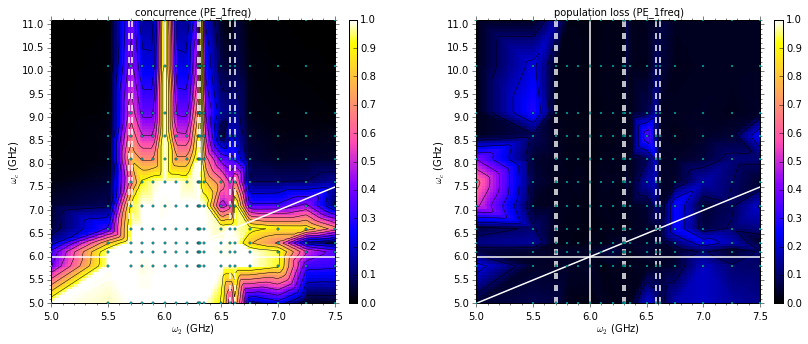

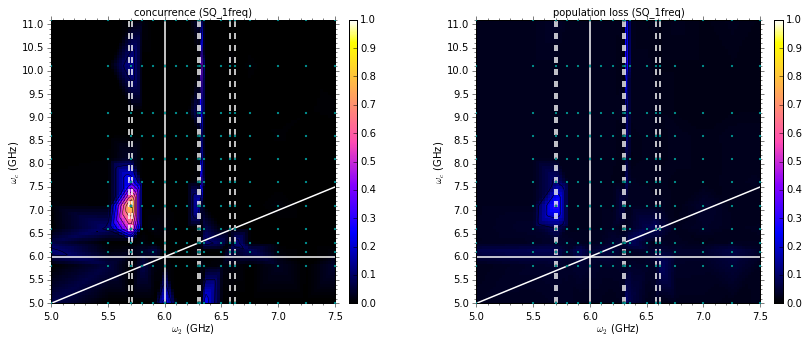

In [40]:
# we write the plots of *all* pulse categories to a file
plot_C_loss(t_PE_200, 'PE', include_total=True, outfile=stage3_PE_C_loss_200_png,
            categories=['1freq', '2freq', '5freq'])
plot_C_loss(t_SQ_200, 'SQ', include_total=True, outfile=stage3_SQ_C_loss_200_png, 
            categories=['1freq', '2freq', '5freq'])
# the plots for just single-frequency pulses are fine to show here
plot_C_loss(t_PE_200, 'PE', include_total=False, outfile=None,
            categories=['1freq',])
plot_C_loss(t_SQ_200, 'SQ', include_total=False, outfile=None, 
            categories=['1freq',])

For a more detailed look, one should look at a log plot of the errors

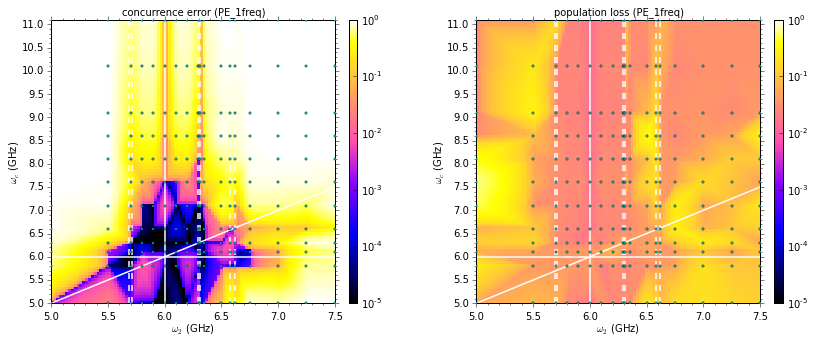

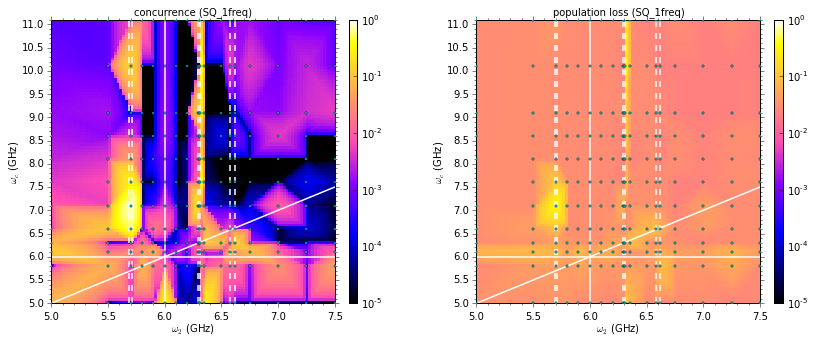

In [42]:
# we write the plots of *all* pulse categories to a file
plot_C_loss(t_PE_200, 'PE', include_total=True, outfile=stage3_PE_C_loss_log_200_png,
            C_min=1.0e-5, C_max=1.0e-0, loss_min=1.0e-5, loss_max=1.0e-0, logscale=True,
            categories=['1freq', '2freq', '5freq'], concurrence_error=True)
plot_C_loss(t_SQ_200, 'SQ', include_total=True, outfile=stage3_SQ_C_loss_log_200_png,
            C_min=1.0e-5, C_max=1.0e-0, loss_min=1.0e-5, loss_max=1.0e-0, logscale=True,
            categories=['1freq', '2freq', '5freq'], concurrence_error=False,)
# the plots for just single-frequency pulses are fine to show here
plot_C_loss(t_PE_200, 'PE', include_total=False, outfile=None,
            C_min=1.0e-5, C_max=1.0e-0, loss_min=1.0e-5, loss_max=1.0e-0, logscale=True,
            categories=['1freq', ], concurrence_error=True)
plot_C_loss(t_SQ_200, 'SQ', include_total=False, outfile=None,
            C_min=1.0e-5, C_max=1.0e-0, loss_min=1.0e-5, loss_max=1.0e-0, logscale=True,
            categories=['1freq', ], concurrence_error=False,)

We may want to look at how much OCT changed the concurrence and the population loss:

In [10]:
# we write the plots of *all* pulse categories to a file
plot_C_loss(t_PE_200, 'PE', include_total=False, outfile=stage3_PE_C_loss_OCT_improve_200_png,
            C_min=1.0e-5, C_max=1.0e-0, loss_min=1.0e-5, loss_max=1.0e-0,
            categories=['1freq', '2freq', '5freq'], show_oct_improvement=True, logscale=True)
plot_C_loss(t_SQ_200, 'SQ', include_total=False, outfile=stage3_SQ_C_loss_OCT_improve_200_png,
            C_min=1.0e-5, C_max=1.0e-0, loss_min=1.0e-5, loss_max=1.0e-0,
            categories=['1freq', '2freq', '5freq'], show_oct_improvement=True, logscale=True)

The concurrence might actually drop, as OCT increases unitarity:

In [11]:
plot_C_loss(t_PE_200, 'PE', include_total=False, outfile=stage3_PE_C_loss_OCT_worse_200_png,
            C_min=1.0e-5, C_max=1.0e-0, loss_min=1.0e-5, loss_max=1.0e-0, scale=-1,
            categories=['1freq', '2freq', '5freq'], show_oct_improvement=True, logscale=True)
plot_C_loss(t_SQ_200, 'SQ', include_total=False, outfile=stage3_SQ_C_loss_OCT_worse_200_png,
            C_min=1.0e-5, C_max=1.0e-0, loss_min=1.0e-5, loss_max=1.0e-0, scale=-1,
            categories=['1freq', '2freq', '5freq'], show_oct_improvement=True, logscale=True)

Lastly, the combined quality:

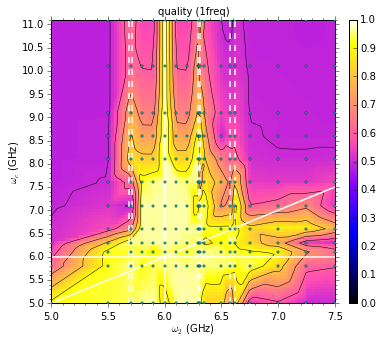

In [41]:
plot_quality(t_PE_200, t_SQ_200, include_total=True, outfile=stage3_quality_200_png,
             categories=['1freq', '2freq', '5freq'])
plot_quality(t_PE_200, t_SQ_200, include_total=False, outfile=None,
             categories=['1freq',])

In [32]:
%matplotlib inline

In [35]:
from QDYN.weyl import WeylChamber
def show_weyl_chamber(table_PE, table_SQ):
    w_PE = WeylChamber()
    w_PE.scatter(table_PE['c1'], table_PE['c2'], table_PE['c3'])
    w_SQ = WeylChamber()
    w_SQ.scatter(table_SQ['c1'], table_SQ['c2'], table_SQ['c3'])
    fig = plt.figure(figsize=(13,5), dpi=72)
    ax_PE = fig.add_subplot(121, projection='3d', title="PE")
    ax_SQ = fig.add_subplot(122, projection='3d', title="SQ")
    w_PE.render(ax_PE)
    w_SQ.render(ax_SQ)
    plt.show(fig)

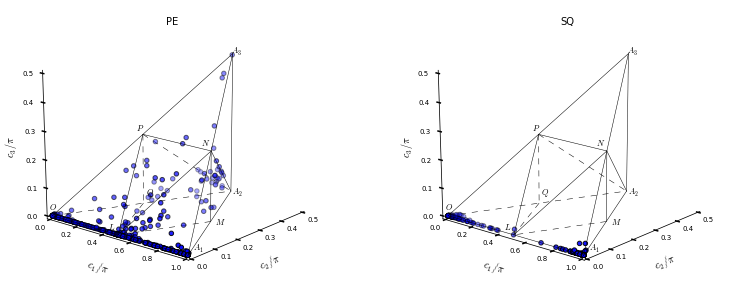

In [36]:
show_weyl_chamber(t_PE_200, t_SQ_200)

For more clarity, we may look only at "successful" points

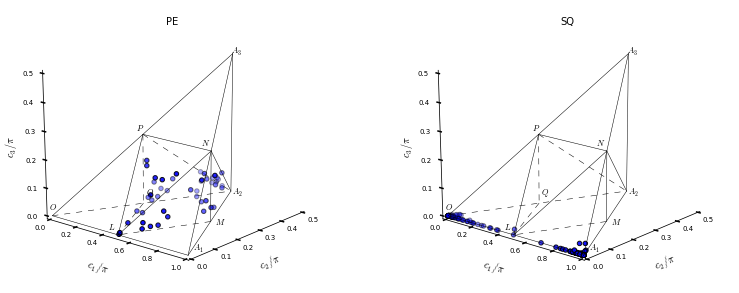

In [37]:
show_weyl_chamber(t_PE_200[(t_PE_200['max loss']<0.1) & (t_PE_200['C']==1.0)],
                  t_SQ_200[t_SQ_200['max loss']<0.1])

## T = 100 ns

In [44]:
stage3_table_100 = get_stage3_table('./runs_100_RWA')

In [45]:
(__, t_PE_100), (__, t_SQ_100) = stage3_table_100.groupby('target', sort=True)

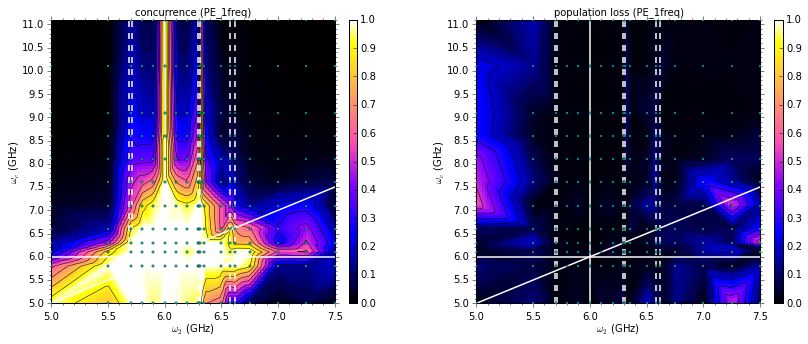

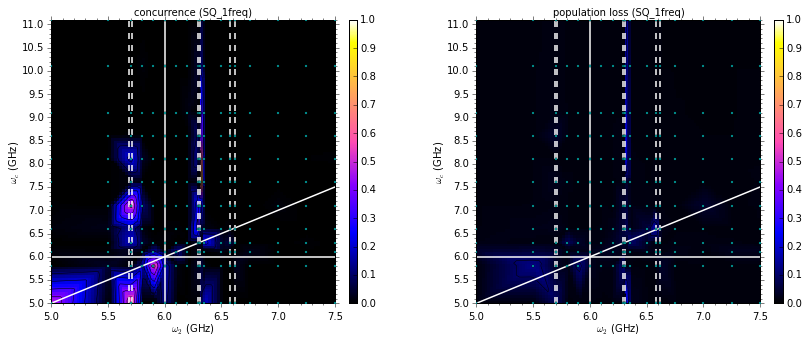

In [46]:
# we write the plots of *all* pulse categories to a file
plot_C_loss(t_PE_100, 'PE', include_total=True, outfile=stage3_PE_C_loss_100_png,
            categories=['1freq', '2freq', '5freq'])
plot_C_loss(t_SQ_100, 'SQ', include_total=False, outfile=stage3_SQ_C_loss_100_png,
            categories=['1freq', '2freq', '5freq'])
# the plots for just single-frequency pulses are fine to show here
plot_C_loss(t_PE_100, 'PE', include_total=False, outfile=None,
            categories=['1freq',])
plot_C_loss(t_SQ_100, 'SQ', include_total=False, outfile=None,
            categories=['1freq',])

For a more detailed look, one should look at a log plot of the errors

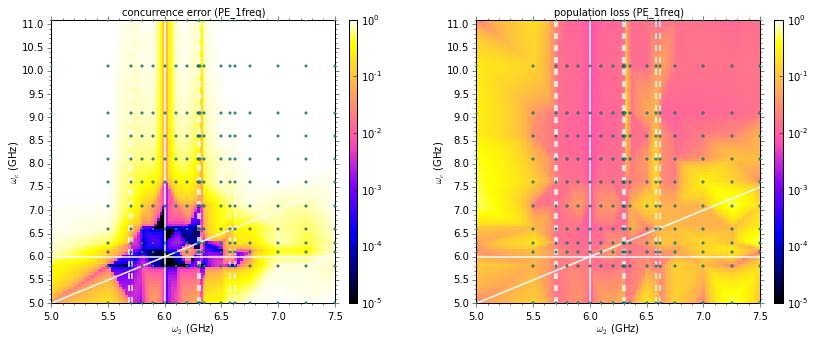

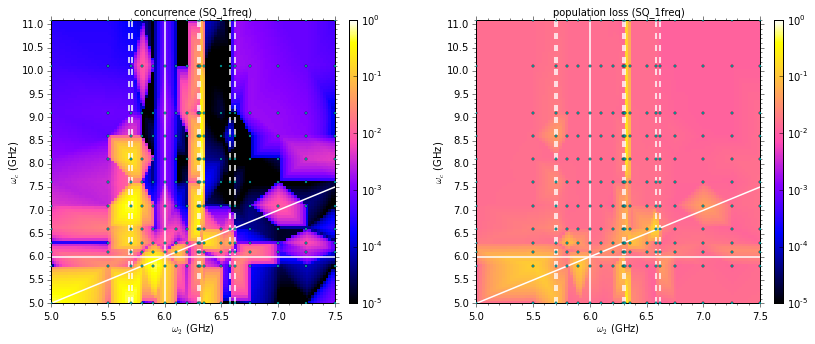

In [47]:
# we write the plots of *all* pulse categories to a file
plot_C_loss(t_PE_100, 'PE', include_total=True, outfile=stage3_PE_C_loss_log_100_png,
            C_min=1.0e-5, C_max=1.0e-0, loss_min=1.0e-5, loss_max=1.0e-0, logscale=True,
            categories=['1freq', '2freq', '5freq'], concurrence_error=True)
plot_C_loss(t_SQ_100, 'SQ', include_total=True, outfile=stage3_SQ_C_loss_log_100_png,
            C_min=1.0e-5, C_max=1.0e-0, loss_min=1.0e-5, loss_max=1.0e-0, logscale=True,
            categories=['1freq', '2freq', '5freq'], concurrence_error=False,)
# the plots for just single-frequency pulses are fine to show here
plot_C_loss(t_PE_100, 'PE', include_total=False, outfile=None,
            C_min=1.0e-5, C_max=1.0e-0, loss_min=1.0e-5, loss_max=1.0e-0, logscale=True,
            categories=['1freq',], concurrence_error=True)
plot_C_loss(t_SQ_100, 'SQ', include_total=False, outfile=None,
            C_min=1.0e-5, C_max=1.0e-0, loss_min=1.0e-5, loss_max=1.0e-0, logscale=True,
            categories=['1freq',], concurrence_error=False,)

We may want to look at how much OCT changed the concurrence and the population loss:

In [48]:
plot_C_loss(t_PE_100, 'PE', include_total=False, outfile=stage3_PE_C_loss_OCT_improve_100_png,
            C_min=1.0e-5, C_max=1.0e-0, loss_min=1.0e-5, loss_max=1.0e-0,
            categories=['1freq', '2freq', '5freq'], show_oct_improvement=True, logscale=True)
plot_C_loss(t_SQ_100, 'SQ', include_total=False, outfile=stage3_SQ_C_loss_OCT_improve_100_png,
            C_min=1.0e-5, C_max=1.0e-0, loss_min=1.0e-5, loss_max=1.0e-0,
            categories=['1freq', '2freq', '5freq'], show_oct_improvement=True, logscale=True)

The concurrence might actually drop, as OCT increases unitarity:

In [49]:
plot_C_loss(t_PE_100, 'PE', include_total=False, outfile=stage3_PE_C_loss_OCT_worse_100_png,
            C_min=1.0e-5, C_max=1.0e-0, loss_min=1.0e-5, loss_max=1.0e-0, scale=-1,
            categories=['1freq', '2freq', '5freq'], show_oct_improvement=True, logscale=True)
plot_C_loss(t_SQ_100, 'SQ', include_total=False, outfile=stage3_SQ_C_loss_OCT_worse_100_png,
            C_min=1.0e-5, C_max=1.0e-0, loss_min=1.0e-5, loss_max=1.0e-0, scale=-1,
            categories=['1freq', '2freq', '5freq'], show_oct_improvement=True, logscale=True)

Lastly, the combined quality:

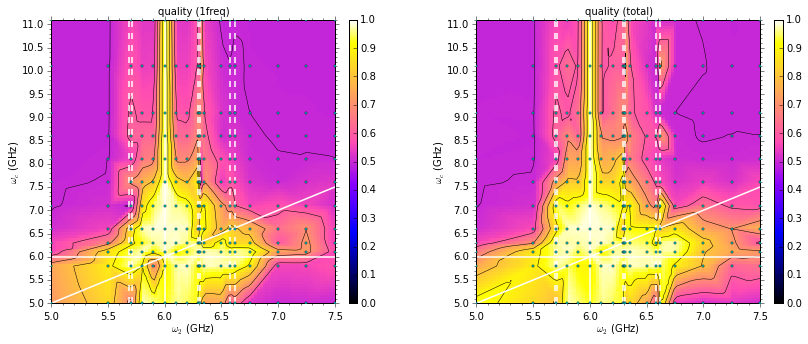

In [50]:
plot_quality(t_PE_100, t_SQ_100, include_total=True, outfile=stage3_quality_100_png,
             categories=['1freq', '2freq', '5freq'])
plot_quality(t_PE_100, t_SQ_100, include_total=True, outfile=None,
             categories=['1freq',])

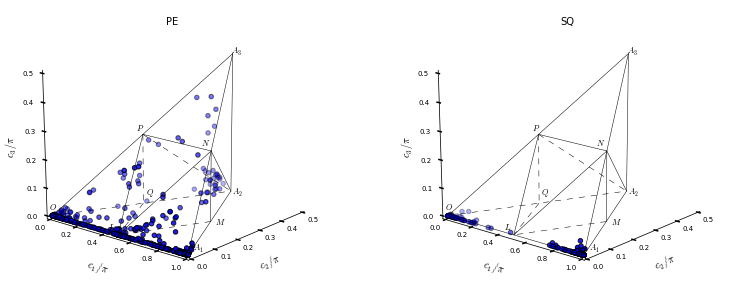

In [51]:
show_weyl_chamber(t_PE_100, t_SQ_100)

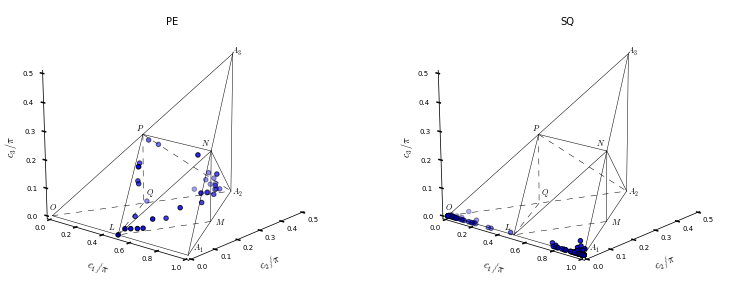

In [52]:
show_weyl_chamber(t_PE_100[(t_PE_100['max loss']<0.1) & (t_PE_100['C']==1.0)],
                  t_SQ_100[t_SQ_100['max loss']<0.1])